DAT340, Assignment 2

*Redacted due to web crawlers*

### Task 1

Step 1

In [1]:
import pandas as pd

# Read the CSV file.
dataTrain = pd.read_csv("adult_train.csv")
dataTest = pd.read_csv("adult_test.csv")

# Shuffle the dataset.
dataTrainShuffled = dataTrain.sample(frac=1.0, random_state=0)
dataTestShuffled = dataTest.sample(frac=1.0, random_state=0)

# Partition the data into training and test sets
Xtrain = dataTrainShuffled.drop("target", axis=1)
Ytrain = dataTrainShuffled["target"].dropna()
Xtest = dataTestShuffled.drop("target", axis=1)
Ytest = dataTestShuffled["target"].dropna()


Step 2

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

Xtrain = Xtrain.to_dict("records")
Xtest = Xtest.to_dict("records")

dv = DictVectorizer()
XtrainEnc = dv.fit_transform(Xtrain)
XtestEnc = dv.transform(Xtest)

print("Cross-validation score:", np.mean(cross_val_score(DecisionTreeClassifier(), XtrainEnc, Ytrain)))

Cross-validation score: 0.8187404108811294


Step 3

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier()
)

model = pipeline.fit(Xtrain, Ytrain)
print("Cross-validation score:", np.mean(cross_val_score(model, Xtrain, Ytrain)))

Cross-validation score: 0.8185869142455969


### Task 2

Decision tree classifier

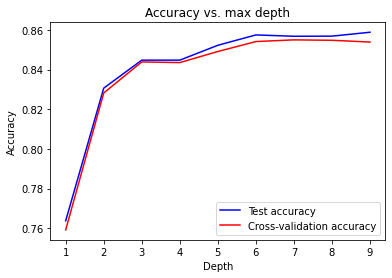

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

scoresTest = []
scores = []
depths = []

for depth in range(1, 10):
    pipeline = make_pipeline(
        DictVectorizer(),
        DecisionTreeClassifier(max_depth=depth)
    )

    model = pipeline.fit(Xtrain, Ytrain)
    Yguess = model.predict(Xtest)
    scores.append(np.mean(cross_val_score(model, Xtrain, Ytrain)))
    scoresTest.append(accuracy_score(Ytest, Yguess))
    depths.append(depth)

plt.title("Accuracy vs. max depth")
plt.plot(depths, scoresTest, color="blue", label="Test accuracy")
plt.plot(depths, scores, color="red", label="Cross-validation accuracy")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Random forest classifier

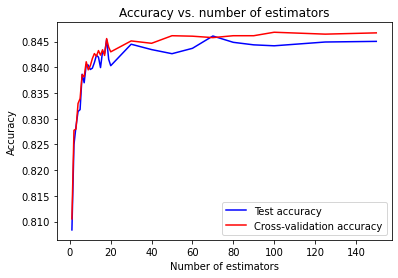

In [5]:
from sklearn.ensemble import RandomForestClassifier

scoresTest = []
scores = []
estimatorsList = []

estimators = 1
while estimators <= 150:
    nbJobs = None if estimators < 20 else -1
    pipeline = make_pipeline(
        DictVectorizer(),
        RandomForestClassifier(n_estimators=estimators, n_jobs=nbJobs)
    )

    model = pipeline.fit(Xtrain, Ytrain)
    Yguess = model.predict(Xtest)
    scores.append(np.mean(cross_val_score(model, Xtrain, Ytrain)))
    scoresTest.append(accuracy_score(Ytest, Yguess))
    estimatorsList.append(estimators)

    if estimators < 20:
        estimators += 1
    elif estimators < 100:
        estimators += 10
    else:
        estimators += 25

plt.title("Accuracy vs. number of estimators")
plt.plot(estimatorsList, scoresTest, color="blue", label="Test accuracy")
plt.plot(estimatorsList, scores, color="red", label="Cross-validation accuracy")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

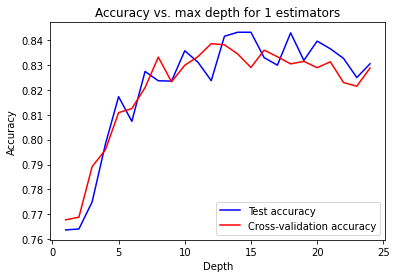

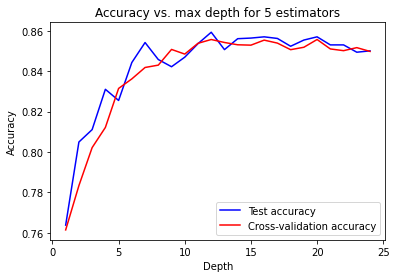

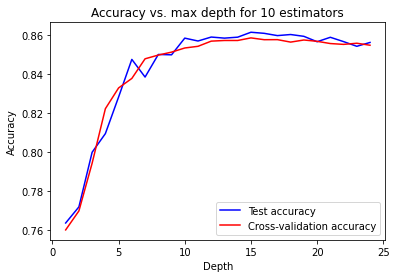

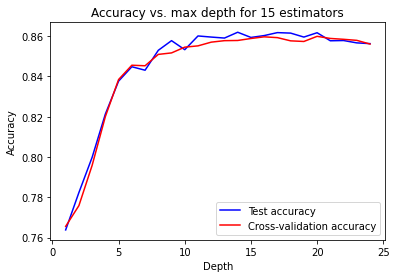

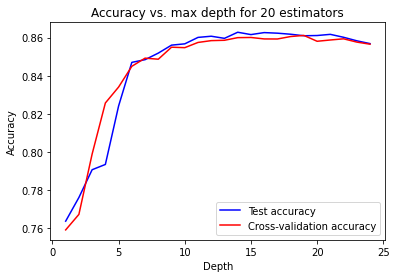

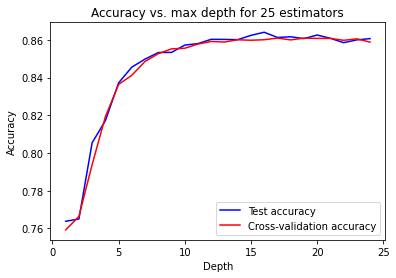

In [10]:
for estimators in (1, 5, 10, 15, 20, 25):
    scoresTest = []
    scores = []
    depths = []

    for depth in range(1, 25):
        pipeline = make_pipeline(
            DictVectorizer(),
            RandomForestClassifier(n_estimators=estimators, max_depth=depth)
        )

        model = pipeline.fit(Xtrain, Ytrain)
        Yguess = model.predict(Xtest)
        scores.append(np.mean(cross_val_score(model, Xtrain, Ytrain)))
        scoresTest.append(accuracy_score(Ytest, Yguess))
        depths.append(depth)

    plt.title(f"Accuracy vs. max depth for {estimators} estimators")
    plt.plot(depths, scoresTest, color="blue", label="Test accuracy")
    plt.plot(depths, scores, color="red", label="Cross-validation accuracy")
    plt.xlabel("Depth")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

- The curve for a decision tree with an ensemble size of 1 is clearly different from the one for a random forest.
An explanation could be that random forests use a sampling of the training data to train the model, while decision trees use the whole training data.
As such, the decision tree is more prone to overfitting.
- When the ensemble size grows, the accuracy of the model get better and the model converges (around a size of 25).
- The training time gets longer as the forest size grows, but the accuracy still gets better.

### Task 3

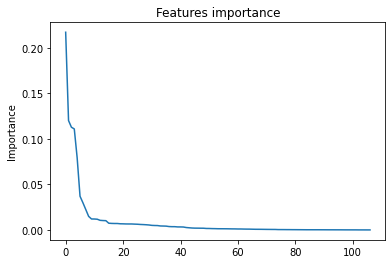

Most important feature: 'age'


In [7]:
pipeline = make_pipeline(
    DictVectorizer(),
    RandomForestClassifier(n_estimators=5, n_jobs=-1)
)

model = pipeline.fit(Xtrain, Ytrain)
features = model.steps[0][1].feature_names_
importances = model.steps[1][1].feature_importances_
sortIndices = np.argsort(importances)[::-1]
importancesSorted = [importances[i] for i in sortIndices]
featuresSorted = [features[i] for i in sortIndices]

plt.title("Features importance")
plt.plot(range(len(sortIndices)), importancesSorted)
plt.ylabel("Importance")
plt.show()

print(f"Most important feature: '{featuresSorted[0]}'")

Based on the work of Parr et al., another way to compute the importance of a feature would simply be to drop the feature (by removing a column)
and recompute the accuracy of the model on the remaining features to determine the importance of this feature on the model.
